# Co-embedding snATAC-seq and scRNA-seq (ALL scRNA-seq cells, ALL ATAC cells)
- https://github.com/satijalab/seurat/issues/5254
- https://github.com/satijalab/seurat/issues/4874
- https://github.com/stuart-lab/signac/issues/219
- Do not SCTransform snATAC-seq data: https://github.com/satijalab/seurat/issues/3359


Co-embedding notebooks:
- 1) ALL scRNA-seq with snATAC-seq (labeled with ALL scRNA-seq), or
- 2) GFP+ scRNA-seq with snATAC-seq (labeled with GFP+ scRNA-seq)

## Set up correct conda environment

In [1]:
.libPaths()

[1] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [2]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

In [3]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

Attaching SeuratObject

Registered S3 method overwritten by 'SeuratDisk'

In [4]:
sample <- 'V'

In [5]:
# value is either 'ALL' or 'GFP' depending on the script
all_or_gfp <- 'GFP'

## STEP 0: Paths

In [6]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger"

In [7]:
rna_path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/', 'RNA', '/', 'RNA.both.conditions.annotated.Seurat.v4.rds')

rna_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/RNA/RNA.both.conditions.annotated.Seurat.v4.rds"

In [8]:
atac_dir <- '/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/ATAC'
atac_path <- paste0(atac_dir, '/3_filtered_anchored_to_', all_or_gfp, '_RNA/', sample, ".ATAC.anchored.", all_or_gfp , ".annotated.Seurat.v4.rds")

atac_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/231220_ATAC/cellranger/xjluo_analysis/step1_qc/ATAC/3_filtered_anchored_to_GFP_RNA/V.ATAC.anchored.GFP.annotated.Seurat.v4.rds"

## STEP 1: Load data

### STEP 1.1 Load RNA object for appropriate condition
- Condition 1: all cells, OR
- Condition 2 : GFP+ sorted only

In [9]:
rna.obj.annotated.Seurat.v4 <- readRDS(rna_path)

In [10]:
rna.obj.annotated.Seurat.v4

An object of class Seurat 
52425 features across 5489 samples within 2 assays 
Active assay: SCT (20140 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, rna_only_UMAP

In [11]:
table(rna.obj.annotated.Seurat.v4$orig.ident)


 all  GFP 
2444 3045 

In [12]:
Idents(rna.obj.annotated.Seurat.v4) <- 'orig.ident'

# Uncomment below line if this notebook focuses on the GFP+ only scRNA-seq experiment
rna.obj.annotated.Seurat.v4 <- subset(x = rna.obj.annotated.Seurat.v4, idents = c('GFP'))

In [13]:
rna.obj.annotated.Seurat.v4

An object of class Seurat 
52425 features across 3045 samples within 2 assays 
Active assay: SCT (20140 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, rna_only_UMAP

### STEP 1.2: Load ATAC object (all GFP-sorted)

In [14]:
atac.obj.annotated.Seurat.v4 <- readRDS(atac_path)

In [15]:
atac.obj.annotated.Seurat.v4

An object of class Seurat 
210475 features across 965 samples within 2 assays 
Active assay: ACTIVITY (2071 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: lsi, umap

### STEP 1.3: Inspect objects

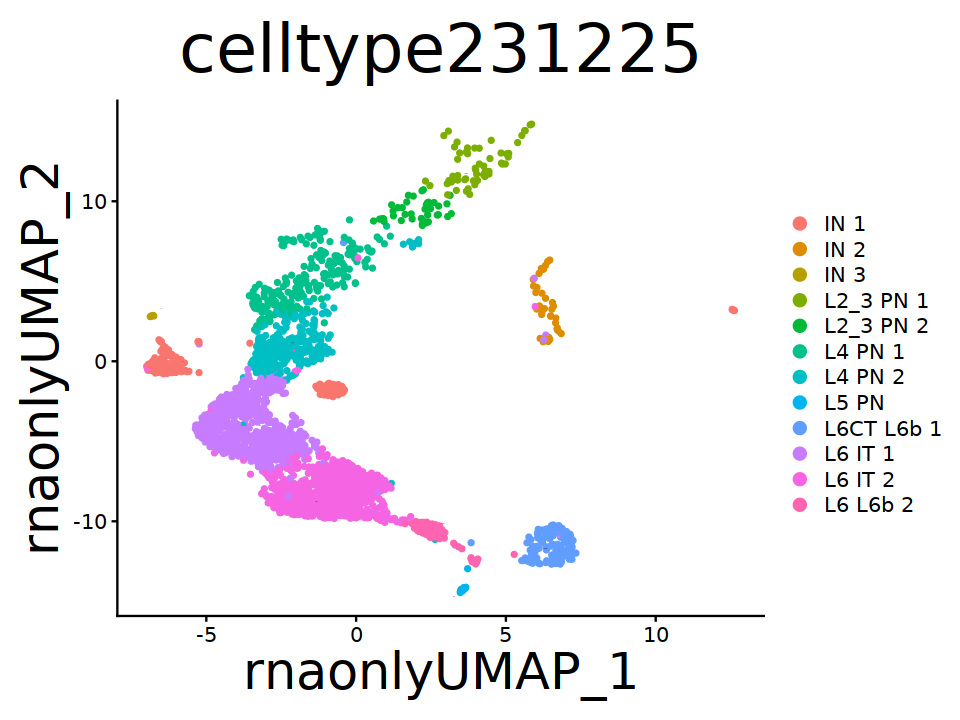

In [16]:
# RNA
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(rna.obj.annotated.Seurat.v4, shuffle=TRUE, label = TRUE, repel = TRUE, pt.size=1, label.size=0, reduction = "rna_only_UMAP", group.by = 'celltype231225', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     


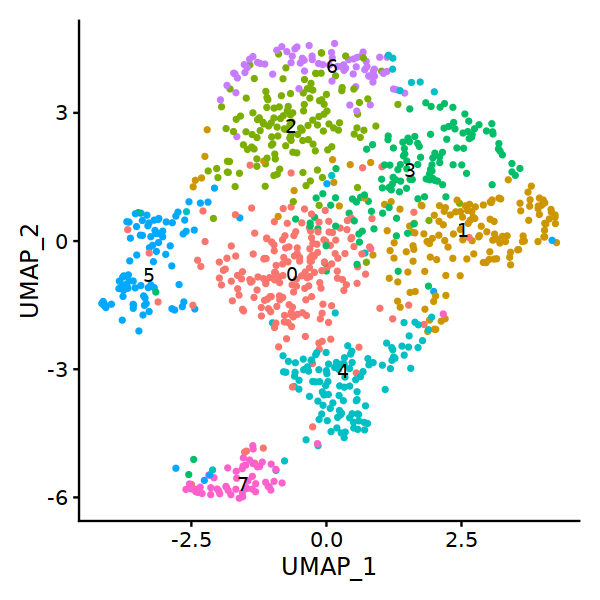

In [17]:
# ATAC
options(repr.plot.width=5, repr.plot.height=5)

DimPlot(object = atac.obj.annotated.Seurat.v4, label = TRUE) + NoLegend()

## STEP 2: Coembed RNA and ATAC

In [18]:
# add 'assay' column
rna.obj.annotated.Seurat.v4$assay <- 'RNA'
atac.obj.annotated.Seurat.v4$assay <- 'ATAC'

atac.obj.annotated.Seurat.v4$celltype231225 <-atac.obj.annotated.Seurat.v4$predicted.id

In [19]:
# note that we restrict the imputation to variable genes from scRNA-seq, but could impute the
# full transcriptome if we wanted to
genes.use <- VariableFeatures(rna.obj.annotated.Seurat.v4)
refdata <- GetAssayData(rna.obj.annotated.Seurat.v4, assay = "RNA", slot = "data")[genes.use, ]

In [20]:
# quantify gene activity
DefaultAssay(atac.obj.annotated.Seurat.v4) <- 'ATAC'
gene.activities <- GeneActivity(atac.obj.annotated.Seurat.v4, features = VariableFeatures(rna.obj.annotated.Seurat.v4))

# add gene activities as a new assay
atac.obj.annotated.Seurat.v4[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)

# normalize gene activities
DefaultAssay(atac.obj.annotated.Seurat.v4) <- "ACTIVITY"
atac.obj.annotated.Seurat.v4 <- NormalizeData(atac.obj.annotated.Seurat.v4)
atac.obj.annotated.Seurat.v4 <- ScaleData(atac.obj.annotated.Seurat.v4, features = rownames(atac.obj.annotated.Seurat.v4))

# Identify anchors
transfer.anchors <- FindTransferAnchors(reference = rna.obj.annotated.Seurat.v4, 
                                        query = atac.obj.annotated.Seurat.v4, 
                                        features = VariableFeatures(object = rna.obj.annotated.Seurat.v4),
                                        reference.assay = "RNA", 
                                        query.assay = "ACTIVITY", 
                                        reduction = "cca")

Extracting gene coordinates

Extracting reads overlapping genomic regions

Centering and scaling data matrix

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4492 anchors

Filtering anchors

	Retained 1480 anchors



In [21]:
# refdata (input) contains a scRNA-seq expression matrix for the scRNA-seq cells.  imputation
# (output) will contain an imputed scRNA-seq matrix for each of the ATAC cells
imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = atac.obj.annotated.Seurat.v4[["lsi"]],
    dims = 2:30)
atac.obj.annotated.Seurat.v4[["RNA"]] <- imputation

Finding integration vectors

Finding integration vector weights

Transfering 3000 features onto reference data



In [22]:
coembed <- merge(x = rna.obj.annotated.Seurat.v4, y = atac.obj.annotated.Seurat.v4)

In [23]:
coembed

An object of class Seurat 
262900 features across 4010 samples within 4 assays 
Active assay: SCT (20140 features, 0 variable features)
 3 other assays present: RNA, ATAC, ACTIVITY

In [24]:
# Finally, we run PCA and UMAP on this combined object, to visualize the co-embedding of both
# datasets

DefaultAssay(coembed) <- 'RNA'
coembed <- ScaleData(coembed, features = genes.use, do.scale = FALSE)
coembed <- RunPCA(coembed, features = genes.use, verbose = FALSE)
coembed <- RunUMAP(coembed, dims = 1:30)

Centering data matrix

15:39:17 UMAP embedding parameters a = 0.9922 b = 1.112

15:39:17 Read 4010 rows and found 30 numeric columns

15:39:17 Using Annoy for neighbor search, n_neighbors = 30

15:39:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:39:18 Writing NN index file to temp file /tmp/RtmpUSlc8O/file8c8f31c2793f

15:39:18 Searching Annoy index using 1 thread, search_k = 3000

15:39:19 Annoy recall = 100%

15:39:21 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

15:39:24 Initializing from normalized Laplacian + noise (using irlba)

15:39:24 Commencing optimization for 500 epochs, with 175986 positive edges

15:39:44 Optimization finished



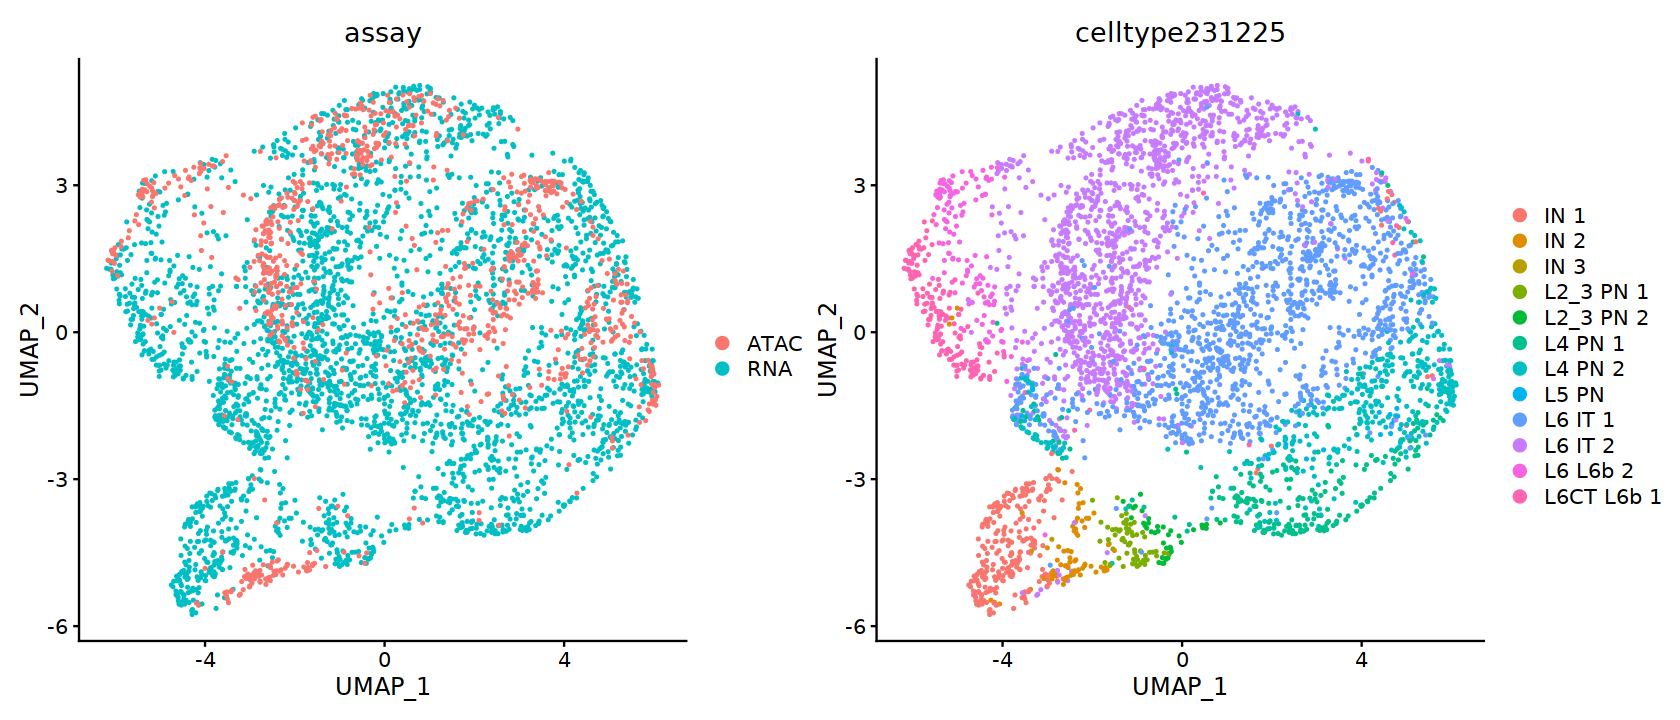

In [25]:
options(repr.plot.width=14, repr.plot.height=6)

DimPlot(coembed, group.by = c("assay", "celltype231225"))

# END